# Supplementary Notebook S02: Gibbs Free Energies of Acetogenic Products

This notebook is supplementary to the the research paper titled:

Optimizing acetogenic CO(2) utilization through metabolic and process engineering highlights the potential of thermophilic bioproduction

It contains functions to balance the stoichiometries of overall reactions of acetogenesis for different main products, to calculate the gibbs free energies of reaction.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [194]:
ElemFormulae = pd.DataFrame({
    "Methane": [1,4,0],
    "Acetate": [2,4,2],
    "Acetone": [3,6,1],
    "Ethanol": [2,6,1],
    "Propanol": [3,8,1],
    "Butanol": [4,10,1],
    "Butyrate": [4,8,2],
    "Butanediol": [4,10,2]},
    index=pd.Index(["C","H","O"])).T

ElemFormulae["form"] = "C" + ElemFormulae["C"].astype(str) + "H" + ElemFormulae["H"].astype(str) + "O" + ElemFormulae["O"].astype(str)
ElemFormulae

,C,H,O,form
Methane,1,4,0,C1H4O0
Acetate,2,4,2,C2H4O2
Acetone,3,6,1,C3H6O1
Ethanol,2,6,1,C2H6O1
Propanol,3,8,1,C3H8O1
Butanol,4,10,1,C4H10O1
Butyrate,4,8,2,C4H8O2
Butanediol,4,10,2,C4H10O2


Write quick functions to balance out elements with carboxydotrophic or homoacetogenic specific substrates and by products.

In [195]:
S_carb = pd.DataFrame()

S_carb["CO"] = -ElemFormulae["C"] + ElemFormulae["O"] - ElemFormulae["C"] - ElemFormulae["H"]/2
S_carb["Water"] = -ElemFormulae["H"]/2
S_carb["CO2"] = -ElemFormulae["O"] + ElemFormulae["C"] + ElemFormulae["H"]/2

S_carb = S_carb.astype(int)
S_carb

,CO,Water,CO2
Methane,-4,-2,3
Acetate,-4,-2,2
Acetone,-8,-3,5
Ethanol,-6,-3,4
Propanol,-9,-4,6
Butanol,-12,-5,8
Butyrate,-10,-4,6
Butanediol,-11,-5,7


In [196]:
S_hom = pd.DataFrame()

S_hom["H2"] = -ElemFormulae["H"]/2 + ElemFormulae["O"] - 2*ElemFormulae["C"]
S_hom["CO2"] = -ElemFormulae["C"]
S_hom["Water"] = -ElemFormulae["O"] + 2*ElemFormulae["C"] 


S_hom = S_hom.astype(int)
S_hom

,H2,CO2,Water
Methane,-4,-1,2
Acetate,-4,-2,2
Acetone,-8,-3,5
Ethanol,-6,-2,3
Propanol,-9,-3,5
Butanol,-12,-4,7
Butyrate,-10,-4,6
Butanediol,-11,-4,6


In [203]:
dG_hom = (pd.DataFrame.sum(S_hom*dfGR,axis = 1, skipna = True) + dfGR[S_hom.index])/S_hom["H2"]
dG_hom
ATP_hom = dG_hom/37.64
ATP_hom

Methane       1.227086
Acetate       1.012952
Acetone       1.007472
Ethanol       0.930260
Propanol      1.022848
Butanol       1.031549
Butyrate      0.994501
Butanediol    0.797363
dtype: float64

In [204]:
dG_carb = (pd.DataFrame.sum(S_carb*dfGR,axis = 1, skipna = True) + dfGR[S_carb.index])/S_carb["CO"]
dG_carb
ATP_carb = dG_carb/37.64
ATP_carb

Methane       1.749668
Acetate       1.535534
Acetone       1.530054
Ethanol       1.452843
Propanol      1.545430
Butanol       1.554131
Butyrate      1.517083
Butanediol    1.319945
dtype: float64

In [201]:
for P in S_hom.index:
    print(P)
    print('{:>2}  {:>30}'.format(f' {-S_hom.H2[P]} H_2 + {-S_hom.CO2[P]} CO_2 = 1 {ElemFormulae.loc[P]["form"]} + {S_hom.Water[P]} H_2O' , f'dGr = {round(dG_hom[P],2)} [kJ/mol]'))
    print('{:>2}  {:>33}'.format(f' {-S_carb.CO[P]} CO + {-S_carb.Water[P]} H_2O = 1 {ElemFormulae.loc[P]["form"]} + {S_carb.CO2[P]} CO_2' , f'dGr = {round(dG_carb[P],2)} [kJ/mol] \n'))

Methane
 4 H_2 + 1 CO_2 = 1 C1H4O0 + 2 H_2O            dGr = 46.19 [kJ/mol]
 4 CO + 2 H_2O = 1 C1H4O0 + 3 CO_2             dGr = 65.86 [kJ/mol] 

Acetate
 4 H_2 + 2 CO_2 = 1 C2H4O2 + 2 H_2O            dGr = 38.13 [kJ/mol]
 4 CO + 2 H_2O = 1 C2H4O2 + 2 CO_2              dGr = 57.8 [kJ/mol] 

Acetone
 8 H_2 + 3 CO_2 = 1 C3H6O1 + 5 H_2O            dGr = 37.92 [kJ/mol]
 8 CO + 3 H_2O = 1 C3H6O1 + 5 CO_2             dGr = 57.59 [kJ/mol] 

Ethanol
 6 H_2 + 2 CO_2 = 1 C2H6O1 + 3 H_2O            dGr = 35.01 [kJ/mol]
 6 CO + 3 H_2O = 1 C2H6O1 + 4 CO_2             dGr = 54.68 [kJ/mol] 

Propanol
 9 H_2 + 3 CO_2 = 1 C3H8O1 + 5 H_2O             dGr = 38.5 [kJ/mol]
 9 CO + 4 H_2O = 1 C3H8O1 + 6 CO_2             dGr = 58.17 [kJ/mol] 

Butanol
 12 H_2 + 4 CO_2 = 1 C4H10O1 + 7 H_2O            dGr = 38.83 [kJ/mol]
 12 CO + 5 H_2O = 1 C4H10O1 + 8 CO_2              dGr = 58.5 [kJ/mol] 

Butyrate
 10 H_2 + 4 CO_2 = 1 C4H8O2 + 6 H_2O            dGr = 37.43 [kJ/mol]
 10 CO + 4 H_2O = 1 C4H8O2 + 6 CO_2      

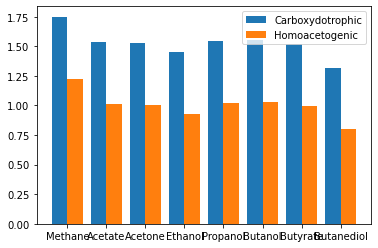

In [255]:
X = ATP_carb.index
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, ATP_carb, 0.4, label = 'Carboxydotrophic')
plt.bar(X_axis + 0.2, ATP_hom, 0.4, label = 'Homoacetogenic')
plt.xticks(X_axis, X)
plt.legend()
plt.show()

<p>Given the reaction stoichiometries:</p>

Homoacetogenic, different products:
<p>Methane: $ 4 H_2 + CO_2  <=> CH_4 + 2 H_2O $</p>
<p>Acetate: $ 4 H_2 + 2 CO_2 <=> C_2H_4O_2 + 2 H_2O $</p>
<p>Acetone: $ 8 H_2 + 3 CO_2 <=> C_3H_6O + 5 H_2O $</p>
<p>Ethanol: $ 6 H_2 + 2 CO_2 <=> C_2H_6O + 3 H_2O $</p>
<p>Propanol: $ 9 H_2 + 3 CO_2 <=> C_3H_8O + 5 H_2O $</p>
<p>Butanol: $ 12 H_2 + 4 CO_2 <=> C_4H_{10}O + 7 H_2O $</p>
<p>Butyrate: $ 10 H_2 + 4 CO_2 <=> C_4H_8O_2 + 6 H_2O $</p>
<p>Butanediol: $ 11 H_2 + 4 CO_2 <=> C_4H_{10}O_2 + 6 H_2O $</p>

Carboxydotrophic, different products:
<p>Methane: $ 4 CO + 2 H_2O  <=> CH_4 + 3 CO_2 $</p>
<p>Acetate: $ 4 CO + 2 H_2O <=> C_2H_4O_2 + 2 CO_2 $</p>
<p>Acetone: $ 8 CO + 3 H_2O <=> C_3H_6O + 5 CO_2 $</p>
<p>Ethanol: $ 6 CO + 3 H_2O <=> C_2H_6O + 4 CO_2 $</p>
<p>Propanol: $ 9 CO + 4 H_2O <=> C_3H_8O + 6 CO_2 $</p>
<p>Butanol: $ 12 CO + 5 H_2O <=> C_4H_{10}O + 8 CO_2 $</p>
<p>Butyrate: $ 10 CO + 4 H_2O <=> C_4H_8O_2 + 6 CO_2 $</p>
<p>Butanediol: $ 11 CO + 5 H_2O <=> C_4H_{10}O_2 + 7 CO_2 $</p>

In [15]:
#Hess's law on element balance reactions:
DrG0_met = - 4*DfG0_H2 - 1*DfG0_CO2 + DfG0_CH4 + 2*DfG0_H2O
DrG0_hom_Actt = -4*DfG0_H2 - 2*DfG0_CO2 + DfG0_Actt + 2*DfG0_H2O
DrG0_hom_Actn = -8*DfG0_H2 - 3*DfG0_CO2 + DfG0_Actn + 5*DfG0_H2O
DrG0_hom_EtOH = -6*DfG0_H2 - 2*DfG0_CO2 + DfG0_EtOH + 3*DfG0_H2O
DrG0_hom_PropOH = -9*DfG0_H2 - 3*DfG0_CO2 + DfG0_PropOH + 5*DfG0_H2O
DrG0_hom_ButOH = -12*DfG0_H2 - 4*DfG0_CO2 + DfG0_ButOH + 7*DfG0_H2O
DrG0_hom_Butyrt = -10*DfG0_H2 - 4*DfG0_CO2 + DfG0_Butyrt + 6*DfG0_H2O
DrG0_hom_Butdiol = -11*DfG0_H2 - 4*DfG0_CO2 + DfG0_Butdiol + 6*DfG0_H2O

DrG0_carb_Actt = -4*DfG0_CO - 2*DfG0_H2O + DfG0_Actt + 2*DfG0_CO2
DrG0_carb_Actn = -8*DfG0_CO - 3*DfG0_H2O + DfG0_Actn + 5*DfG0_CO2
DrG0_carb_EtOH = -6*DfG0_CO - 3*DfG0_H2O + DfG0_EtOH + 4*DfG0_CO2
DrG0_carb_PropOH = -9*DfG0_CO - 4*DfG0_H2O + DfG0_PropOH + 6*DfG0_CO2
DrG0_carb_ButOH = -12*DfG0_CO - 5*DfG0_H2O + DfG0_ButOH + 8*DfG0_CO2
DrG0_carb_Butyrt = -10*DfG0_CO - 4*DfG0_H2O + DfG0_Butyrt + 6*DfG0_CO2
DrG0_carb_Butdiol = -11*DfG0_CO - 5*DfG0_H2O + DfG0_Butdiol + 7*DfG0_CO2

print("Gibbs energy per mol electron donor:\n",
      " DrG0_met/S =",round(DrG0_met/4,1),"[kJ/mol]\n",
      " DrG0_carb_Actt/S =",round(DrG0_carb_Actt/4,1),"[kJ/mol]\n",
      " DrG0_carb_Actn/S =",round(DrG0_carb_Actn/8,1),"[kJ/mol]\n",
      " DrG0_carb_EtOH/S =",round(DrG0_carb_EtOH/6,1),"[kJ/mol]\n",
      " DrG0_carb_PropOH/S =",round(DrG0_carb_PropOH/9,1),"[kJ/mol]\n",
      " DrG0_carb_ButOH/S =",round(DrG0_carb_ButOH/12,1),"[kJ/mol]\n",
      " DrG0_carb_Butyrt/S =",round(DrG0_carb_Butyrt/10,1),"[kJ/mol]\n",
      " DrG0_carb_Butdiol/S =",round(DrG0_carb_Butdiol/11,1),"[kJ/mol]\n",
      " DrG0_hom_Actt/S =",round(DrG0_hom_Actt/4,1),"[kJ/mol]\n",
      " DrG0_hom_Actn/S =",round(DrG0_hom_Actn/8,1),"[kJ/mol]\n",
      " DrG0_hom_EtOH/S =",round(DrG0_hom_EtOH/6,1),"[kJ/mol]\n",
      " DrG0_hom_PropOH/S =",round(DrG0_hom_PropOH/9,1),"[kJ/mol]\n",
      " DrG0_hom_ButOH/S =",round(DrG0_hom_ButOH/12,1),"[kJ/mol]\n",
      " DrG0_hom_Butyrt/S =",round(DrG0_hom_Butyrt/10,1),"[kJ/mol]\n",
      " DrG0_hom_Butdiol/S =",round(DrG0_hom_Butdiol/11,1),"[kJ/mol]\n")

Gibbs energy per mol electron donor:
  DrG0_met/S = -46.2 [kJ/mol]
  DrG0_carb_Actt/S = -57.8 [kJ/mol]
  DrG0_carb_Actn/S = -57.6 [kJ/mol]
  DrG0_carb_EtOH/S = -54.7 [kJ/mol]
  DrG0_carb_PropOH/S = -58.2 [kJ/mol]
  DrG0_carb_ButOH/S = -58.5 [kJ/mol]
  DrG0_carb_Butyrt/S = -57.1 [kJ/mol]
  DrG0_carb_Butdiol/S = -49.7 [kJ/mol]
  DrG0_hom_Actt/S = -38.1 [kJ/mol]
  DrG0_hom_Actn/S = -37.9 [kJ/mol]
  DrG0_hom_EtOH/S = -35.0 [kJ/mol]
  DrG0_hom_PropOH/S = -38.5 [kJ/mol]
  DrG0_hom_ButOH/S = -38.8 [kJ/mol]
  DrG0_hom_Butyrt/S = -37.4 [kJ/mol]
  DrG0_hom_Butdiol/S = -30.0 [kJ/mol]



<p>Given the reaction stoichiometries:</p>
<p>$ 2 Acetate <=> Acetone + CO_2 + H_2O $</p>
<p>$ Acetate <=> CH_4 + CO_2$</p>
<p>$ Acetate + 2 O_2 <=> 2 CO_2 + 2 H_2O$</p>

In [6]:
DrG0_Actt_Actn = -2*DfG0_Actt + DfG0_Actn + DfG0_CO2 + DfG0_H2O
DrG0_Actt_Anaer = -DfG0_Actt + DfG0_MetOH + DfG0_CO2
DrG0_Actt_Aerob = -DfG0_Actt - 2*DfG0_O2 + 2*DfG0_CO2 + 2*DfG0_H2O

print("Gibbs energy per mol substrate:\n",
      " DrG0_Actt_Actn/S =",round(DrG0_Actt_Actn/2,1),"[kJ/mol]\n",
      " DrG0_Actt_Anaer/S =",round(DrG0_Actt_Anaer,1),"[kJ/mol]\n",
      " DrG0_Actt_Aerob/S =",round(DrG0_Actt_Aerob,1),"[kJ/mol]\n")

Gibbs energy per mol substrate:
  DrG0_Actt_Actn/S = 0.8 [kJ/mol]
  DrG0_Actt_Anaer/S = -173.2 [kJ/mol]
  DrG0_Actt_Aerob/S = -899.5 [kJ/mol]

